In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
HIV_df=pd.read_csv('HIV_dataset.csv') 

In [3]:
HIV_df.head(5)

,Age,Marital Status,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Status
0,22,2,2,1,1,2,Bar,1,1,1
1,20,2,2,1,2,1,None,1,2,2
2,23,1,1,1,2,1,None,3,2,2
3,24,1,2,1,1,1,Park,1,1,1
4,18,2,1,2,1,2,Internet,1,1,1


In [4]:
columns_to_drop=['Educational Background', 'Places of seeking sex partners']

In [5]:
HIV_df=HIV_df.drop(columns_to_drop,axis=1)

In [6]:
feature_columns = ['Age', 'Marital Status', 'HIV TEST IN PAST YEAR', 'AIDS education', 'SEXUAL ORIENTATION', 'Drug- taking']
X = HIV_df[feature_columns]
y = HIV_df.Status

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8714285714285714


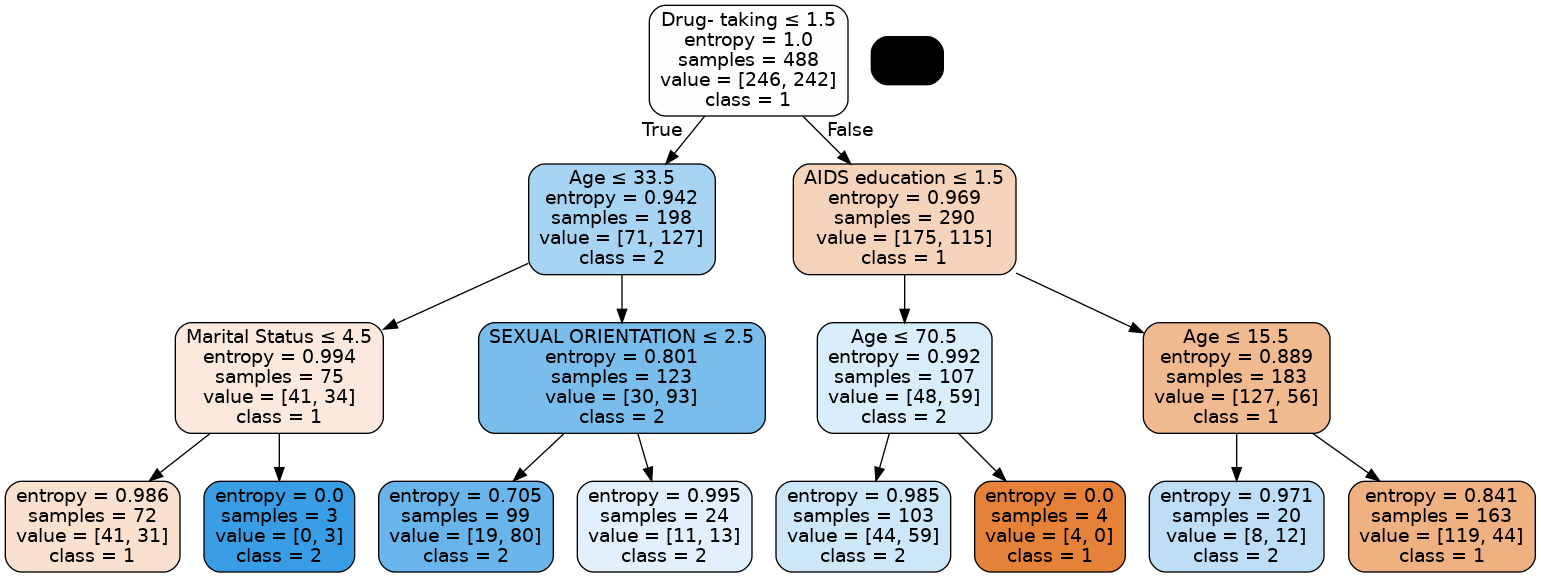

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HIV.png')
Image(graph.create_png())


In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6571428571428571


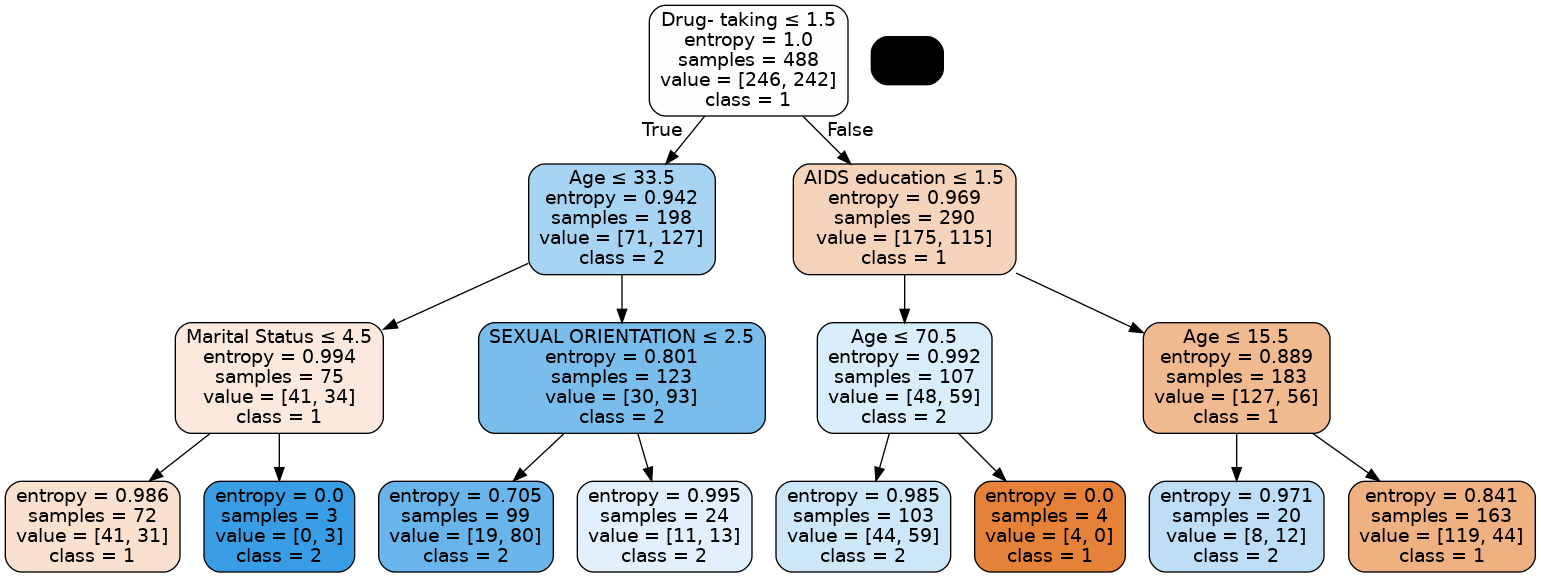

In [17]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())